In [1]:
import pandas as pd

In [2]:
# Read training data from json into a dataframe
train_data_df = pd.read_json('train.json')

In [3]:
train_data_df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
import matplotlib.pyplot as plt

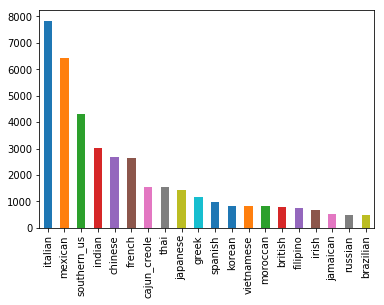

In [5]:
train_data_df['cuisine'].value_counts().plot(kind='bar')

In [6]:
from collections import Counter

In [7]:
# Count the number of recipes in which a unique ingredient is appearing in each cuisine
count_ingredients_cuisine = {}
for cuisine in train_data_df['cuisine'].unique():
    count_ingredients_cuisine[cuisine] = Counter()
    cuisine_indices = (train_data_df['cuisine'] == cuisine)
    for ingredients in train_data_df[cuisine_indices]['ingredients']:
        count_ingredients_cuisine[cuisine].update(ingredients)

In [8]:
# The 15 most common ingredients in indian cuisine
count_ingredients_cuisine['indian'].most_common(15)

[('salt', 1934),
 ('onions', 1195),
 ('garam masala', 862),
 ('water', 820),
 ('ground turmeric', 728),
 ('garlic', 726),
 ('cumin seed', 697),
 ('ground cumin', 683),
 ('vegetable oil', 593),
 ('oil', 546),
 ('ginger', 526),
 ('tomatoes', 521),
 ('tumeric', 492),
 ('chili powder', 485),
 ('green chilies', 484)]

In [9]:
# Create a dataframe of top 15 ingredients
top15 = pd.DataFrame([[item[0] for item in count_ingredients_cuisine[cuisine].most_common(15)] 
                      for cuisine in count_ingredients_cuisine], 
                    index=[cuisine for cuisine in count_ingredients_cuisine], 
                    columns=['top{}'.format(i) for i in range(1, 16)])
top15.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper,feta cheese,cucumber,purple onion,onions,lemon juice
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk,eggs,pepper,onions,ground black pepper,vanilla extract
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper,fish sauce,bay leaves,vegetable oil,eggs,cooking oil
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil,ginger,tomatoes,tumeric,chili powder,green chilies
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves,vegetable oil,ground black pepper,sugar,ground cinnamon,brown sugar


## Preprocessing

In [10]:
# Create a column in the dataframe which combines the ingredients to a string
train_data_df['string_ingredients'] = train_data_df['ingredients'].map(';'.join)
train_data_df.head()

,cuisine,id,ingredients,string_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


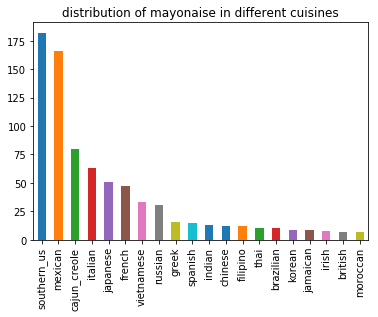

In [11]:
# Distribution of an ingredient(mayonaise) in different cuisines
indices_mayonaise = train_data_df['string_ingredients'].str.contains('mayonaise')
train_data_df[indices_mayonaise]['cuisine'].value_counts().plot(kind='bar', title='distribution of mayonaise in different cuisines')

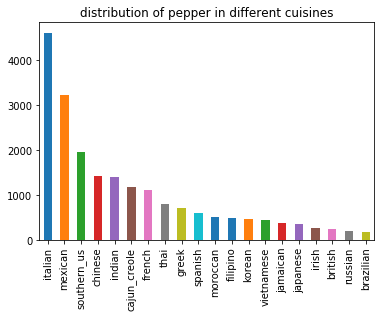

In [12]:
# Distribution of an ingredient(pepper) in different cuisines
indices_pepper = train_data_df['string_ingredients'].str.contains('pepper')
train_data_df[indices_pepper]['cuisine'].value_counts().plot(kind='bar', title='distribution of pepper in different cuisines')

The number of recipes in different cuisines are different. So, it is better to plot the relative frequencies. The relative frequency can be calculated by dividing by the total number of recipes in that cuisine

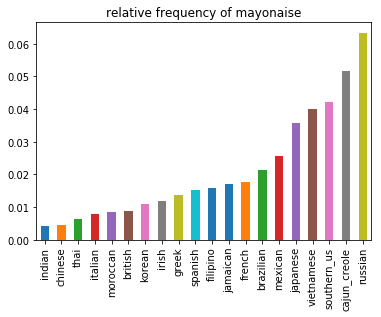

In [13]:
relative_frequency_mayo = (train_data_df[indices_mayonaise]['cuisine'].value_counts() / 
                          train_data_df['cuisine'].value_counts())
relative_frequency_mayo.sort_values(inplace=True)
relative_frequency_mayo.plot(kind='bar', title='relative frequency of mayonaise')

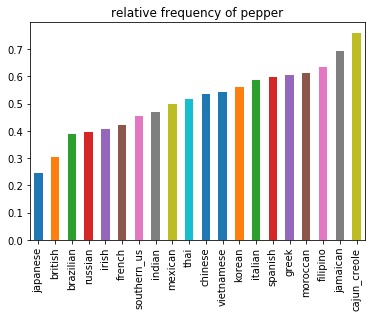

In [14]:
relative_frequency_pepper = (train_data_df[indices_pepper]['cuisine'].value_counts() / 
                            train_data_df['cuisine'].value_counts())
relative_frequency_pepper.sort_values(inplace=True)
relative_frequency_pepper.plot(kind='bar', title='relative frequency of pepper')

In [15]:
import numpy as np

In [16]:
# Unique ingredients in the top 15
unique = np.unique(top15.values.ravel())
unique

array(['Gochujang base', 'all-purpose flour', 'avocado', 'baking powder',
       'baking soda', 'bay leaves', 'beansprouts', 'black pepper',
       'brown sugar', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'celery',
       'chili powder', 'chopped cilantro fresh', 'coconut milk',
       'cooking oil', 'corn starch', 'corn tortillas', 'couscous',
       'cucumber', 'cumin seed', 'dried oregano', 'dried thyme',
       'dry white wine', 'eggs', 'extra-virgin olive oil', 'feta cheese',
       'feta cheese crumbles', 'fish sauce', 'flour', 'fresh basil',
       'fresh ginger', 'fresh lemon juice', 'fresh lime juice',
       'fresh parsley', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green chilies', 'green onions', 'ground allspice',
       'ground black pepper', 'ground cinnamon', 'ground coriander',
       'ground cumin', 'ground ginger', 'ground turmeric', 'heavy cream',


In [17]:
len(unique)

90

In [ ]:
# A subplot of the distribution of the most common uniques in different cuisines
fig, axes = plt.subplots(15, 6, figsize=(15,25))
for ingredient, ax_index in zip(unique, range(90)):
    indices = train_data_df['string_ingredients'].str.contains(ingredient)
    relative_freq = (train_data_df[indices]['cuisine'].value_counts() / 
                    train_data_df['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], title=ingredient)

Some of the distinguishing ingredients can be found out from the plot.
For example, garam masala is mostly used in indian recipes. Salsa is mostly used in mexican recipes. Ground allspice is used in jamaican recipes.

In [ ]:
# Separate train data
train_data_list = [ingredients for ingredients in list(train_data_df['ingredients'])]
train_data_list # A 2D list

In [ ]:
# Separate train labels
train_label_list = [cuisine for cuisine in list(train_data_df['cuisine'])]
train_label_list

In [ ]:
# Replace blank spaces with underscores
def remove_white_space(list):
    string_of_words = ''
    for sublist in list:
        string_of_words += ' '.join(string.replace(' ', '_') for string in sublist)
    return string_of_words.split(' ')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(token_pattern='[a-zA-Z]+_*[a-zA-Z]+')
train_data_vectorized = vectorizer.fit_transform(list_of_ingredients)
print(train_data_vectorized)

In [ ]:
vectorizer.vocabulary_

In [ ]:
list_of_ingredients = remove_white_space(train_data_list)
len(list_of_ingredients)
list_of_ingredients